In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

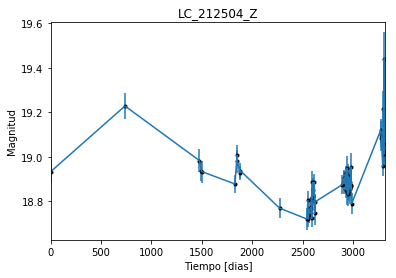

In [2]:
data = np.genfromtxt('LC_212504_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_212504_Z')
plt.savefig("LC_212504_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

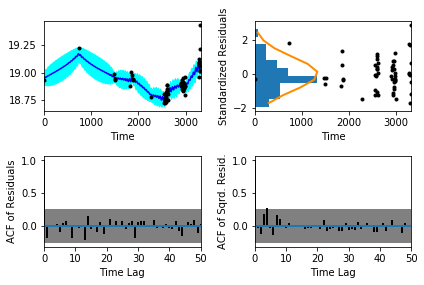

In [5]:
sample.assess_fit()

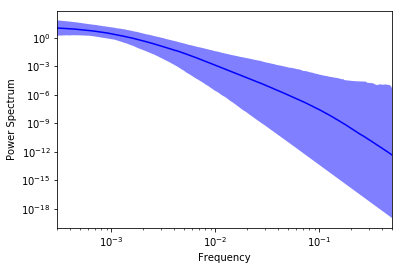

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

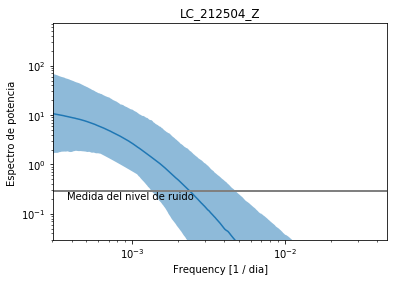

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_212504_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_212504_Z')

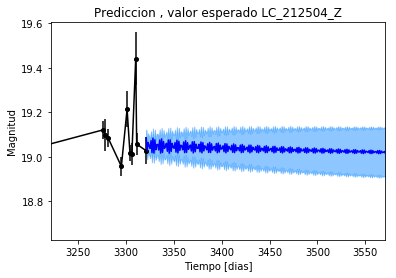

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_212504_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_212504_Z')

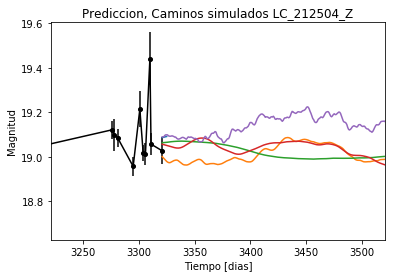

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_212504_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


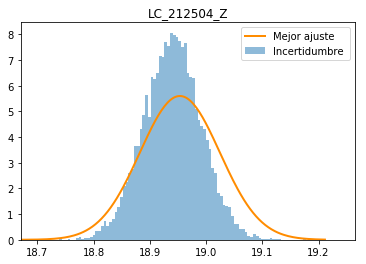

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_212504_Z')
plt.savefig("Mejor_ajuste_LC_212504_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_212504_Z')

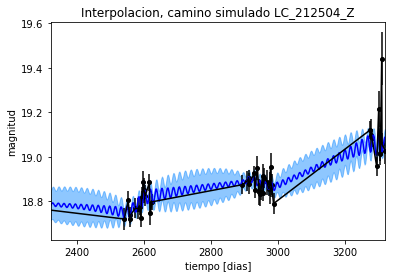

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_212504_Z')

Text(0.5,1,'Interpolacion, camino simulado  LC_212504_Z')

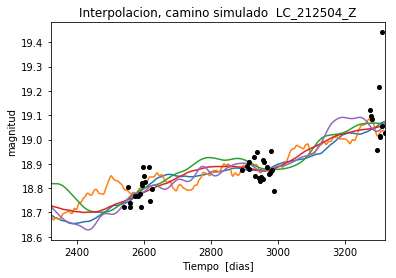

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_212504_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 736.994956989
Median: 0.00788061996595
Standard deviation: 0.19932063313
68% credibility interval: [ 0.0006571   0.18843815]
95% credibility interval: [  3.38970198e-04   7.75957650e-01]
99% credibility interval: [  3.10262819e-04   9.58374217e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 375.478728408
Median: 0.00113343802858
Standard deviation: 0.0827903749639
68% credibility interval: [ 0.00042782  0.01387768]
95% credibility interval: [ 0.00031937  0.21810349]
99% credibility interval: [  3.04465314e-04   6.73034222e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 408.477590114
Median: 0.0201824406262
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1091.59077125
Median: 97.8211674245
Standard deviation: 1.59154332506
68% credibility interval: [ 96.07085657  98.9397361 ]
95% credibility interval: [ 93.67923127  99.64406357]
99% credibility interval: [  91.71739237  101.40062354]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 258.350888048
Median: 0.656394533907
Standard deviation: 2.23552589431
68% credibility interval: [ 0.05200621  3.95562085]
95% credibility interval: [ 0.01297851  7.71839817]
99% credibility interval: [  9.98558152e-03   1.04842031e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 399.029430654
Median: 0.220436135596
Standard deviation: 7.78878713961
68% credibility interval: [  5.85030161e-03   6.70365093e+00]
95% credibility interv

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 947.53057317
Median: 3.57159585416e-44
Standard deviation: 1.47683379259e+140
68% credibility interval: [  1.39386261e-88   8.12330029e-06]
95% credibility interval: [  1.84841141e-112   2.50053126e+103]
99% credibility interval: [  2.90596670e-118   6.32253704e+138]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3026.34647159
Median: 18.9529141613
Standard deviation: 0.0829938659914
68% credibility interval: [ 18.89067042  19.03150133]
95% credibility interval: [ 18.80757514  19.13205333]
99% credibility interval: [ 18.70517596  19.24580873]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 392.826010151
Median: 0.000960393069358
Standard deviation: 0.209850828556
68% credibility interval: [ 0.         0.2390512]
95% credibility interval: [ 0.          0.79321856]
99% credibility interval: [ 0.          0.95357935]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 392.826010151
Median: 0.000960393069358
Standard deviation: 0.209850828556
68% credibility interval: [ 0.         0.2390512]
95% credibility interval: [ 0.          0.79321856]
99% credibility interval: [ 0.          0.95357935]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1053.24456822
Median: 0.0
Standard deviation: 0.00036507518742
68% cre

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1091.59077125
Median: 97.8211674245
Standard deviation: 1.59154332506
68% credibility interval: [ 96.07085657  98.9397361 ]
95% credibility interval: [ 93.67923127  99.64406357]
99% credibility interval: [  91.71739237  101.40062354]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1398.45054016
Median: 0.0216847034873
Standard deviation: 0.0300628127239
68% credibility interval: [ 0.01163872  0.04580324]
95% credibility interval: [ 0.00708766  0.10484362]
99% credibility interval: [ 0.00551222  0.19734426]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 927.103772774
Median: 1.1489178586
Standard deviation: 0.182999564759
68% credibility interval: [ 0.98984954  1.33768857]
95% credibility interval: [ 0.83399155  1.57389642]
99% credibility interval: [ 0.75351176  1.73784559]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 266.85787984
Median: 3.3713680944e-05
Standard deviation: 0.0555195345115
68% credibility interval: [  2.61572274e-07   2.38692460e-03]
95% credibility interval: [  5.16143326e-108   1.73984855e-001]
99% credibility interval: [  1.14043508e-143   2.74273862e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 736.994956989
Median: (-0.0495153955815+0j)
Standard deviation: 1.81850281445
68% credibility interval: [-1.18399179-5.48894985j -0.00412871-2.81454706j]
95% credibility interval: [ -4.87548571e+00+0.j          -2.12981257e-03-0.00453287j]
99% credibility interval: [ -6.02164280e+00+0.j          -1.94943878e-03-0.00208798j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 375.478728408
Median: (-0.00712160116778+0.0050573080454j)
Standard deviation: 1.41743447329
68% credibility interval: [-0.08719601+1.02353172j -0.00268805+0.00224205j]
95% credibility interval: [-1.37038466+1.6674874j -0.00200666+0.j       ]
99% credibility interval: [ -4.22879874e+00+0.37907326j  -1.91301199e-03+0.00199132j]
Posterior summary for par